## This is a Data Exploratory Project


# Garment industry assignment
## Punyatoya Behera

In [2]:
import pandas as pd # loading the library
import seaborn as sns # loading the library

url = 'https://raw.githubusercontent.com/codymbaldwin/sample-files/master/garments_workers_jan.csv'
df_1 = pd.read_csv(url)  # read the csv files into a pandas dataframe
url = 'https://raw.githubusercontent.com/codymbaldwin/sample-files/master/garments_workers_feb.csv'
df_2 = pd.read_csv(url)  # read the csv files into a pandas dataframe

In [3]:
df_com = pd.concat([df_1, df_2]) # combining the two dataframes

In [4]:
df_com.shape # checking dimensions

(990, 15)

In [5]:
sum(df_com.duplicated(df_com.columns)) # checking for duplicates

5

In [7]:
df_com = df_com.drop_duplicates(df_com.columns,keep='last') # removing the duplicates

In [8]:
sum(df_com.duplicated(df_com.columns)) # checking for duplicates after removing

0

In [9]:
df_com.info() #list the columns and their data types

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 0 to 442
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   985 non-null    object 
 1   quarter                985 non-null    object 
 2   day                    985 non-null    object 
 3   department             985 non-null    object 
 4   team                   985 non-null    int64  
 5   no_of_workers          985 non-null    float64
 6   smv                    985 non-null    float64
 7   wip                    576 non-null    float64
 8   over_time              985 non-null    int64  
 9   incentive              985 non-null    int64  
 10  no_of_style_change     985 non-null    int64  
 11  idle_time              985 non-null    float64
 12  idle_men               985 non-null    int64  
 13  targeted_productivity  985 non-null    float64
 14  actual_productivity    985 non-null    float64
dtypes: float64(

In [10]:
df_com.head() #preview first few records

,date,quarter,day,department,team,no_of_workers,smv,wip,over_time,incentive,no_of_style_change,idle_time,idle_men,targeted_productivity,actual_productivity
0,1/1/2015,Quarter1,Thursday,sweing,8,59.0,26.16,1108.0,7080,98,0,0.0,0,0.80,0.940725
1,1/1/2015,Quarter1,Thursday,finishing,1,8.0,3.94,NaN,960,0,0,0.0,0,0.75,0.886500
2,1/1/2015,Quarter1,Thursday,sweing,11,30.5,11.41,968.0,3660,50,0,0.0,0,0.80,0.800570
3,1/1/2015,Quarter1,Thursday,sweing,12,30.5,11.41,968.0,3660,50,0,0.0,0,0.80,0.800570
4,1/1/2015,Quarter1,Thursday,sweing,6,56.0,25.90,1170.0,1920,50,0,0.0,0,0.80,0.800382


In [12]:
# renaming columns
df_com = df_com.rename(columns={'targeted_productivity':'productivity_target','actual_productivity':'productivity_actual','team':'team_number','no_of_workers':'team_workers','idle_time':'interruption_time','idle_men':'interruption_people','smv':'allocated_task_time','wip':'unfinished_items','no_of_style_change':'style_changes'})


In [16]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 0 to 442
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 985 non-null    object 
 1   quarter              985 non-null    object 
 2   day                  985 non-null    object 
 3   department           985 non-null    object 
 4   team_number          985 non-null    int64  
 5   team_workers         985 non-null    float64
 6   allocated_task_time  985 non-null    float64
 7   unfinished_items     576 non-null    float64
 8   over_time            985 non-null    int64  
 9   incentive            985 non-null    int64  
 10  style_changes        985 non-null    int64  
 11  interruption_time    985 non-null    float64
 12  interruption_people  985 non-null    int64  
 13  productivity_target  985 non-null    float64
 14  productivity_actual  985 non-null    float64
dtypes: float64(6), int64(5), object(4)
memory usa

In [14]:
#changing the values in the quarter field
df_com['quarter'] = df_com['quarter'].replace(['Quarter1','Quarter2','Quarter3','Quarter4'],['Q1','Q2','Q3','Q4'])

In [15]:
df_com['quarter'].head()

,quarter
0,Q1
1,Q1
2,Q1
3,Q1
4,Q1


In [17]:
# correcting the misspelling
df_com['department'] = df_com['department'].replace({'sweing': 'sewing'})

In [18]:
df_com['department'].head()

,department
0,sewing
1,finishing
2,sewing
3,sewing
4,sewing


In [19]:
# sorting the values
df_com = df_com.sort_values(by=['date','department', 'productivity_actual'],ascending=[True,True,True])

In [20]:
df_com.head()

,date,quarter,day,department,team_number,team_workers,allocated_task_time,unfinished_items,over_time,incentive,style_changes,interruption_time,interruption_people,productivity_target,productivity_actual
18,1/1/2015,Q1,Thursday,finishing,11,12.0,4.15,NaN,1440,0,0,0.0,0,0.70,0.436326
16,1/1/2015,Q1,Thursday,finishing,7,8.0,2.90,NaN,960,0,0,0.0,0,0.80,0.540729
15,1/1/2015,Q1,Thursday,finishing,4,18.0,3.94,NaN,2160,0,0,0.0,0,0.75,0.593056
14,1/1/2015,Q1,Thursday,finishing,8,8.0,2.90,NaN,960,0,0,0.0,0,0.75,0.676667
13,1/1/2015,Q1,Thursday,finishing,10,8.0,3.94,NaN,960,0,0,0.0,0,0.65,0.705917


In [21]:
 #creating a new column
 df_com['productivity_difference'] = df_com['productivity_actual'] - df_com['productivity_target']

In [22]:
df_com.head()

,date,quarter,day,department,team_number,team_workers,allocated_task_time,unfinished_items,over_time,incentive,style_changes,interruption_time,interruption_people,productivity_target,productivity_actual,productivity_difference
18,1/1/2015,Q1,Thursday,finishing,11,12.0,4.15,NaN,1440,0,0,0.0,0,0.70,0.436326,-0.263674
16,1/1/2015,Q1,Thursday,finishing,7,8.0,2.90,NaN,960,0,0,0.0,0,0.80,0.540729,-0.259271
15,1/1/2015,Q1,Thursday,finishing,4,18.0,3.94,NaN,2160,0,0,0.0,0,0.75,0.593056,-0.156944
14,1/1/2015,Q1,Thursday,finishing,8,8.0,2.90,NaN,960,0,0,0.0,0,0.75,0.676667,-0.073333
13,1/1/2015,Q1,Thursday,finishing,10,8.0,3.94,NaN,960,0,0,0.0,0,0.65,0.705917,0.055917


In [23]:
df_com.describe() # finding descriptive statistics

,team_number,team_workers,allocated_task_time,unfinished_items,over_time,incentive,style_changes,interruption_time,interruption_people,productivity_target,productivity_actual,productivity_difference
count,985.000000,985.000000,985.000000,576.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,6.440609,35.053807,15.250294,1240.298611,4736.091371,26.540102,0.151269,0.869036,0.342132,0.731797,0.738565,0.006768
std,3.448338,22.224491,11.024761,2001.655993,3474.294132,31.421322,0.442256,14.005193,3.140300,0.099738,0.178415,0.164120
min,1.000000,2.000000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,0.233705,-0.561958
25%,3.000000,9.000000,3.940000,785.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.650300,-0.016250
50%,7.000000,34.000000,15.260000,1047.000000,4080.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.790003,0.000537
75%,9.000000,57.000000,23.540000,1263.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,0.800000,0.850502,0.100024
max,12.000000,89.000000,54.560000,23122.000000,25920.000000,138.000000,2.000000,300.000000,45.000000,0.800000,1.120437,0.644375


In [24]:
df_com.isnull().sum() # finding the null values

,0
date,0
quarter,0
day,0
department,0
team_number,0
team_workers,0
allocated_task_time,0
unfinished_items,409
over_time,0
incentive,0


In [25]:
# filling the null values
df_com['unfinished_items'].fillna(0, inplace=True)

/tmp/ipython-input-2752531848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_com['unfinished_items'].fillna(0, inplace=True) # filling the null values


In [26]:
df_com.isnull().sum()

,0
date,0
quarter,0
day,0
department,0
team_number,0
team_workers,0
allocated_task_time,0
unfinished_items,0
over_time,0
incentive,0


In [28]:
#count frequency of each unique value
df_com['department'].value_counts()

,count
department,
sewing,576
finishing,257
finishing,152


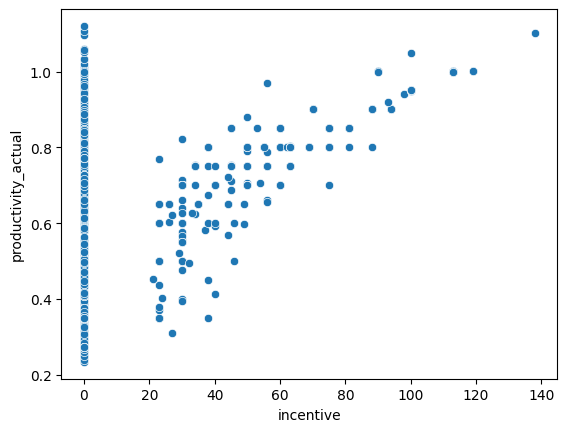

In [29]:
#plot a graph
sns.scatterplot(x='incentive', y='productivity_actual',data = df_com);